<a href="https://colab.research.google.com/github/derac-begin/segmented-sieve-python/blob/master/%E7%89%B9%E5%BE%B4%E9%87%8F%E3%82%A8%E3%83%B3%E3%82%B8%E3%83%8B%E3%82%A2%E3%83%AA%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install numpy==2.0.2
!pip install pandas==2.2.2
!pip install matplotlib==3.10.0

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('user_data.csv', index_col=0)
df

,purchase_amount,purchase_count,gender,age_group,signup_date,churn
0,52500.0,17.0,M,10s,2024-03-22,0
1,49300.0,14.0,M,50s,2024-10-05,0
2,53200.0,14.0,M,NaN,2024-12-04,1
3,57600.0,25.0,F,30s,2024-12-30,0
4,48800.0,11.0,F,40s,2024-11-26,0
...,...,...,...,...,...,...
195,51900.0,23.0,F,40s,2024-12-07,0
196,45600.0,NaN,M,40s,2024-11-21,0
197,50800.0,25.0,M,20s,2024-05-09,0
198,50300.0,7.0,M,60s,2024-08-02,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   purchase_amount  200 non-null    float64
 1   purchase_count   190 non-null    float64
 2   gender           200 non-null    object 
 3   age_group        195 non-null    object 
 4   signup_date      200 non-null    object 
 5   churn            200 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 19.0+ KB


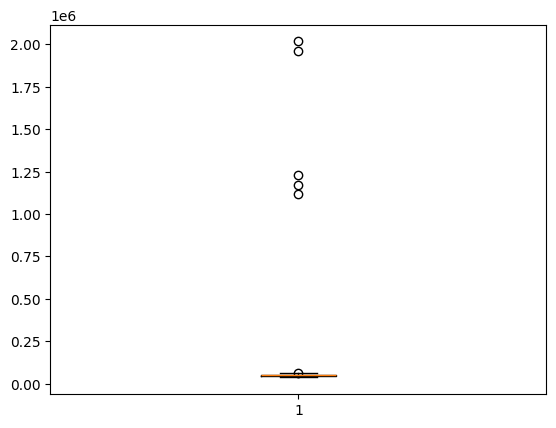

In [7]:
plt.boxplot(df['purchase_amount'])
plt.show()

In [16]:
df_outlier = df.copy()

mean = df_outlier["purchase_amount"].mean()
std = df_outlier["purchase_amount"].std()

lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

df_outlier.loc[(df_outlier["purchase_amount"] < lower_bound) | (df_outlier["purchase_amount"] > upper_bound), "purchase_amount"] = np.nan

df_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   purchase_amount  195 non-null    float64
 1   purchase_count   190 non-null    float64
 2   gender           200 non-null    object 
 3   age_group        195 non-null    object 
 4   signup_date      200 non-null    object 
 5   churn            200 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 19.0+ KB


In [17]:
df_outlier.isnull().sum()
df_outlier.dropna()

,purchase_amount,purchase_count,gender,age_group,signup_date,churn
0,52500.0,17.0,M,10s,2024-03-22,0
1,49300.0,14.0,M,50s,2024-10-05,0
3,57600.0,25.0,F,30s,2024-12-30,0
4,48800.0,11.0,F,40s,2024-11-26,0
5,48800.0,15.0,M,50s,2024-05-08,0
...,...,...,...,...,...,...
194,50900.0,17.0,F,30s,2024-09-15,1
195,51900.0,23.0,F,40s,2024-12-07,0
197,50800.0,25.0,M,20s,2024-05-09,0
198,50300.0,7.0,M,60s,2024-08-02,1


In [18]:
df_outlier["purchase_amount"] = df_outlier["purchase_amount"].fillna(df_outlier["purchase_amount"].mean())
df_outlier["purchase_count"] = df_outlier["purchase_count"].fillna(df_outlier["purchase_count"].mean())
df_outlier["age_group"] = df_outlier["age_group"].fillna(df_outlier["age_group"].mode()[0])

In [19]:
df_outlier.isnull().sum()

,0
purchase_amount,0
purchase_count,0
gender,0
age_group,0
signup_date,0
churn,0


In [20]:
df["churn"].value_counts()

,count
churn,
0,142
1,58


In [21]:
!pip install imbalanced-learn==0.13.0

In [22]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

df_imb = df_outlier.copy()

X_imb = df_imb.drop("churn", axis=1)
Y_imb = df_imb["churn"]

undersampler = RandomUnderSampler(random_state=42)
X_under, Y_under = undersampler.fit_resample(X_imb, Y_imb)
print("アンダーサンプリング")
print(Y_under.value_counts())

oversampler = RandomOverSampler(random_state=42)
X_over, Y_over = oversampler.fit_resample(X_imb, Y_imb)
print("オーバーサンプリング")
print(Y_over.value_counts())


アンダーサンプリング
churn
0    58
1    58
Name: count, dtype: int64
オーバーサンプリング
churn
0    142
1    142
Name: count, dtype: int64


In [24]:
df_temp = df_outlier.copy()

df_temp["gender_age"] = df_temp["gender"] + "_" + df_temp["age_group"]
df_temp

,purchase_amount,purchase_count,gender,age_group,signup_date,churn,gender_age
0,52500.0,17.000000,M,10s,2024-03-22,0,M_10s
1,49300.0,14.000000,M,50s,2024-10-05,0,M_50s
2,53200.0,14.000000,M,40s,2024-12-04,1,M_40s
3,57600.0,25.000000,F,30s,2024-12-30,0,F_30s
4,48800.0,11.000000,F,40s,2024-11-26,0,F_40s
...,...,...,...,...,...,...,...
195,51900.0,23.000000,F,40s,2024-12-07,0,F_40s
196,45600.0,15.015789,M,40s,2024-11-21,0,M_40s
197,50800.0,25.000000,M,20s,2024-05-09,0,M_20s
198,50300.0,7.000000,M,60s,2024-08-02,1,M_60s


In [30]:
# label encoding
from sklearn.preprocessing import LabelEncoder
df_temp = df_outlier.copy()
df_temp["gender_label"] = LabelEncoder().fit_transform(df_temp["gender"])
df_temp

# One-Hot Encodeing
df_temp = df_outlier.copy()
df_temp = pd.get_dummies(df_temp, columns = ["gender", "age_group"], drop_first = True)
df_temp

,purchase_amount,purchase_count,signup_date,churn,gender_M,age_group_20s,age_group_30s,age_group_40s,age_group_50s,age_group_60s
0,52500.0,17.000000,2024-03-22,0,True,False,False,False,False,False
1,49300.0,14.000000,2024-10-05,0,True,False,False,False,True,False
2,53200.0,14.000000,2024-12-04,1,True,False,False,True,False,False
3,57600.0,25.000000,2024-12-30,0,False,False,True,False,False,False
4,48800.0,11.000000,2024-11-26,0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
195,51900.0,23.000000,2024-12-07,0,False,False,False,True,False,False
196,45600.0,15.015789,2024-11-21,0,True,False,False,True,False,False
197,50800.0,25.000000,2024-05-09,0,True,True,False,False,False,False
198,50300.0,7.000000,2024-08-02,1,True,False,False,False,False,True
